# Data Exploration
## Sample Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/news/USAEvents_OnlyUnigrams_2018_08_02_02_27_59/eventassignment.txt", sep="\t", header=None, names=["EventID","publication","pubid","seqid","canonicalUrl","title","text","titleFingerprintJSON","textFingerprintJSON","cleanedTitle"])
df.head()

,EventID,publication,pubid,seqid,canonicalUrl,title,text,titleFingerprintJSON,textFingerprintJSON,cleanedTitle
0,EventID,publication,pubid,seqid,canonicalUrl,title,text,titleFingerprintJSON,textFingerprintJSON,cleanedTitle
1,0,fox5dc.com,630,68,fox5dc.com/news/politics/amid-tumult-trump-ral...,"Trump renews attacks on 'fake, fake disgusting...",Dog and duck are BFF's Man dragged off Metro t...,"{""wordCounts"":{""1239"":1,""1257"":1,""4068"":1,""298...","{""wordCounts"":{""4431"":1,""6298"":1,""19605"":1,""12...","Trump renews attacks on 'fake, fake disgusting..."
2,0,marketwatch.com,43,328,marketwatch.com/story/citing-criticism-shes-fa...,"Citing criticism she’s faced, Sarah Sanders do...",Reuters White House press secretary Sarah Sand...,"{""wordCounts"":{""4527"":1,""864"":1,""2232"":1,""6350...","{""wordCounts"":{""5435"":1,""885"":2,""969"":2,""1724""...","Citing criticism she’s faced, Sarah Sanders do..."
3,0,foxnews.com,3,166,foxnews.com/politics/2018/08/02/trump-defends-...,"Trump defends Russia and meetings, attacks 'o...",Trump: We're getting border security or closin...,"{""wordCounts"":{""1239"":1,""1671"":1,""3514"":1,""272...","{""wordCounts"":{""1239"":19,""31"":2,""1336"":1,""1305...","Trump defends Russia and meetings, attacks 'ov..."
4,0,valleymorningstar.com,1862,104,valleymorningstar.com/entertainment/sanders-wo...,Sanders won't dispute claim that media is 'ene...,WASHINGTON (AP) — White House press secretary ...,"{""wordCounts"":{""6352"":1,""2914"":1,""2966"":1,""162...","{""wordCounts"":{""373"":1,""3222"":1,""885"":2,""969"":...",Sanders won't dispute claim that media is 'ene...


In [9]:
df.columns

Index(['EventID', 'publication', 'pubid', 'seqid', 'canonicalUrl', 'title',
       'text', 'titleFingerprintJSON', 'textFingerprintJSON', 'cleanedTitle'],
      dtype='object')

In [10]:
df["publication"].describe()

count              38707
unique              1920
top       yahoo.com/news
freq                 696
Name: publication, dtype: object

## Publisher Descriptives

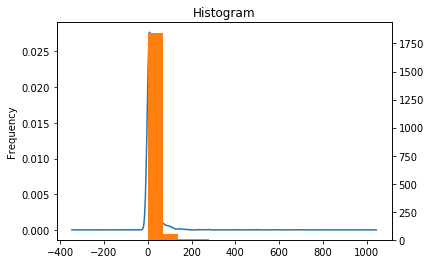

In [58]:
publisher_size = df.groupby("publication").size()

ax = publisher_size.plot.kde()
publisher_size.plot.hist(ax=ax, secondary_y = True, title="Histogram")

Basically nothing surprising here. A lot of publishers have a small set of articles on a given day. However some are publishing a lot. See the log plot for a more detailed histogram.

Text(0.5,1,'Log Histogram of Publisher Size')

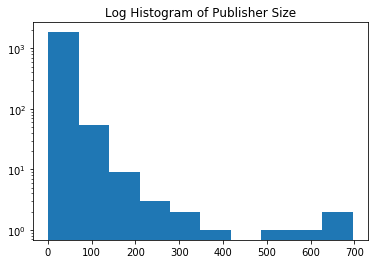

In [54]:
plt.hist(publisher_size, log = True)
plt.title("Log Histogram of Publisher Size")

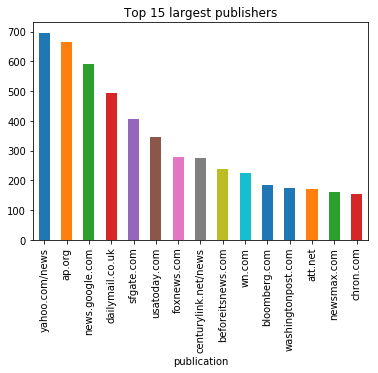

In [63]:
publisher_size.nlargest(15).plot.bar(title="Top 15 largest publishers")

In [50]:
publisher_size[publisher_size > 50].count()

125

## Event Descriptives

In [51]:
df["EventID"].describe()

count     38707
unique     4748
top           0
freq       1159
Name: EventID, dtype: object

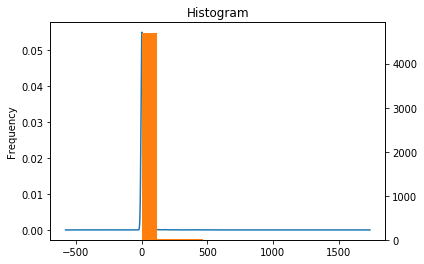

In [65]:
event_size = df.groupby("EventID").size()

ax = event_size.plot.kde()
event_size.plot.hist(ax=ax, secondary_y = True, title="Histogram")

Text(0.5,1,'Log Histogram of Event Size')

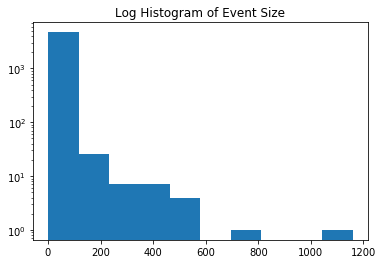

In [66]:
plt.hist(event_size, log = True)
plt.title("Log Histogram of Event Size")

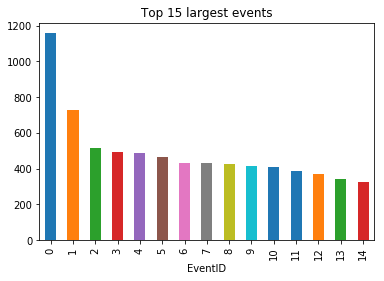

In [67]:
event_size.nlargest(15).plot.bar(title="Top 15 largest events")

In [68]:
event_size.nlargest(15)

EventID
0     1159
1      728
2      514
3      494
4      488
5      465
6      434
7      431
8      427
9      417
10     408
11     386
12     371
13     340
14     324
dtype: int64